# Punto 1 

En este punto se aceleró la ejecucion del codigo usando Numba como compilador jit. 


La probabilidad de sacar 21 con la baraja Española:  0.1577773
La probabilidad de sacar 21 con la baraja de Poker:  0.14475
Tiempo de ejecución:  25.24070978164673 segundos para:  10000000  iteraciones.
distribucion cartas: 
     baraja española        baraja de poker


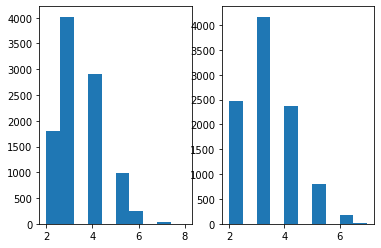

In [1]:
from time import time as tm
from numba import jit
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot
import time     
#Esto es como un codigo en C pero hecho en python, esto para poder ser compilado con Numba (que es un JIT compiler para python)
#Con Numba este codigo corre 10.000.000 de simulaciones en solo 24 - 25 segundos

#baraja española
cartas1 = [1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12] 

#baraja de poker 
cartas2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]

cartas1.sort()
cartas2.sort()
cartas1NumPy = np.array(cartas1)
cartas2NumPy = np.array(cartas2)

@jit(nopython=True)
def veintiunaNumPy(cartasNP):
  cont = 1
  temp = cartasNP 
  carta = np.random.choice(cartasNP)
  for i in range(0,len(temp) - 1): 
      if carta == temp[i]:
        temp = np.delete(temp, i)
        break 
  while carta < 21: 
    cont += 1 
    carta2 = np.random.choice(temp)
    carta = carta + carta2 
    for i in range(0,len(temp) - 1): 
      if carta2 == temp[i]:
        temp = np.delete(temp, i)
        break 
  if carta == 21: 
    return np.array([0, cont])
  else:
    return np.array([1, cont])

#si funciona, dejalo quieto. 
@jit(nopython=True)
def probabilidadNP(cartas,ciclos): 
  baraja = len(cartas)
  cont = 0 
  index = 0
  lista_res = np.zeros(ciclos)
  for i in range(0,ciclos):
    res = veintiunaNumPy(cartas)
    if (res[0] == 0):
      if (index < 9999): 
        lista_res[index] = res[1]
        index += 1
        cont += 1
      else: 
        cont += 1
  if baraja == 52:
    print("La probabilidad de sacar 21 con la baraja de Poker: ", (cont/ciclos))
  elif baraja == 48: 
    print("La probabilidad de sacar 21 con la baraja Española: ", (cont/ciclos))

  return lista_res[lista_res != 0]

#Numero de Bucles usados = 10.000.000 

start_time = tm()

bucles = 10000000
cartas_21_baraja_Spanish = probabilidadNP(cartas1NumPy,bucles) 
cartas_21_baraja_Poker = probabilidadNP(cartas2NumPy,bucles) 

fig, axs = matplotlib.pyplot.subplots(1, 2);
axs[0].hist(cartas_21_baraja_Spanish,);
axs[1].hist(cartas_21_baraja_Poker);


elapsed_time = tm() - start_time
print("Tiempo de ejecución: ", elapsed_time , "segundos para: ", bucles, " iteraciones.")
print("distribucion cartas: ")
print("     baraja española        baraja de poker")




#Punto 2

Spanish 48-deck
Probabilidad 21:  0.1488 Avg cartas:  3.6821236559139785


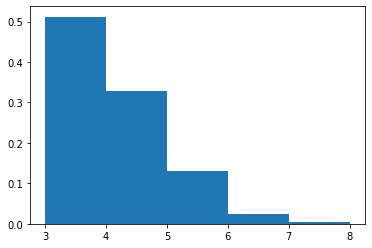

Spanish and Poker card decks
Probabilidad 21:  0.1333 Avg cartas:  3.609152288072018


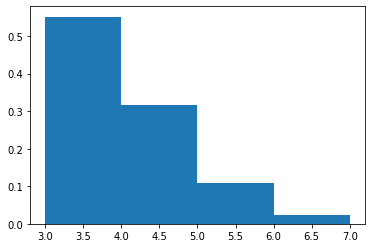

In [ ]:
import random
import numpy as np
import matplotlib.pyplot 
deck_0 = [1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]
deck_1 = [1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]
def prob(deck):
  setN = np.array([]);
  for _ in range(10000): 
    auxDeck = deck.copy();
    nCards = 0;
    sum = 0;
    while sum < 21:
      nCard = random.randint(0, len(auxDeck)-1) ;
      sum +=  auxDeck[nCard];
      del auxDeck[nCard]
      nCards+=1;
    if sum == 21:
      setN = np.append(setN,[nCards])
  print("Probabilidad 21: ", len(setN)/10000, "Avg cartas: ", np.average(setN))
  matplotlib.pyplot.hist(setN, density = True, bins=int(max(setN) - min(setN)))
  matplotlib.pyplot.show()
print("Spanish 48-deck")
prob(deck_0)
print("Spanish and Poker card decks")
prob(deck_1)

# Punto 3

¿Cuantas pruebas quiere hacer?: 10000
proabilidadesdespues de la mitad del juego :
probabilidad de que salga 21 (Spanish):  0.0967  numero promedio de cartas(Spanish):  4.066184074457084


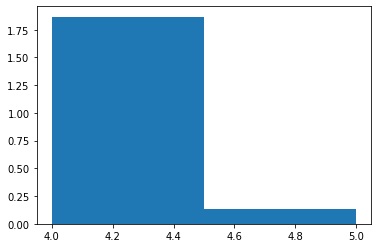

probabilidad de que salga 21 (Poker):  0.0842  numero promedio de cartas(Poker):  4.066508313539193


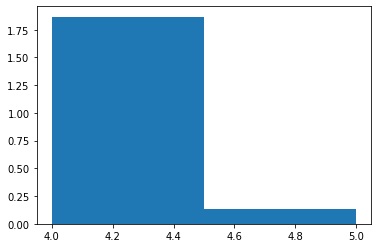

1

In [ ]:
import random
import matplotlib.pyplot as plt
    # a las barajas les quite un 5 y dos sietes  a cada una  ya que segun el punto 3(sig-linea)
    #solo se permiten maximo dos sietes y tres cincos 

ANCSpanish=0; 
ANCPoker=0
countSpanish=0
countPoker=0 
nc21Spanish=[]
nc21Poker=[]
n = int(input("¿Cuantas pruebas quiere hacer?: "))
print("proabilidadesdespues de la mitad del juego :")
for t in range (n):
    spanishDeck=[1,2,3,4,6,10,11,11,1,2,3,4,5,6,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]        
    pokerDeck=[1,2,3,4,6,8,9,10,11,12,13,1,2,3,4,5,6,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]

    poker_halfDeck=[]
    spanish_halfDeck=[]

    cardsSpanish=[7,7,5] # la simulacion empieza desde la mitad del juego y cuando el jugador ya tiene las cartas 7,7,5 en la mano (tiene 3 caratas)
    cardsPoker=[7,7,5] 

    numberOfCardsPoker=3
    numberOfCardsSpanish=3


    for i in range (len(pokerDeck)//2):    
        a=random.choice(pokerDeck)
        poker_halfDeck.append(a)
        pokerDeck.remove(a)
        

    for i in range (len(spanishDeck)//2):    
        a=random.choice(spanishDeck)
        spanish_halfDeck.append(a)
        spanishDeck.remove(a)

    while sum(cardsSpanish)<21 :
        b=random.choice(spanish_halfDeck)
        cardsSpanish.append(b)
        spanish_halfDeck.remove(b)
        numberOfCardsSpanish+=1
    
    while sum(cardsPoker)<21 :
        b=random.choice(poker_halfDeck)
        cardsPoker.append(b)
        poker_halfDeck.remove(b)
        numberOfCardsPoker+=1

    if sum(cardsSpanish)==21 :
      countSpanish+=1
      ANCSpanish=ANCSpanish+numberOfCardsSpanish
      nc21Spanish.append(numberOfCardsSpanish)
    
    if sum(cardsPoker)==21 :
      countPoker+=1
      ANCPoker=ANCPoker+numberOfCardsPoker
      nc21Poker.append(numberOfCardsPoker)

print("probabilidad de que salga 21 (Spanish): ",countSpanish/n," numero promedio de cartas(Spanish): ",ANCSpanish/countSpanish)
plt.hist(nc21Spanish,density=True,bins=2)
plt.show()
max(nc21Spanish)-min(nc21Spanish)

print("probabilidad de que salga 21 (Poker): ",countPoker/n," numero promedio de cartas(Poker): ",ANCPoker/countPoker)
plt.hist(nc21Poker,density=True,bins=2)
plt.show()
max(nc21Poker)-min(nc21Poker)



# Punto 4


* calculo de forma analitica Hot Deck:

> la lista de cartas de un hot deck es de [1,1,1,1,2,2,2,2,x,x,x,x], siendo las x los numeros de cartas diferentes de 1 y 2.

> 1- La probabilidad de obtener un 2 en esta baraja es igual a $\frac{4}{12} = \frac{1}{3}$

> 2- La probabilidad de obtener un 1 el el primer lanzamiento es de $\frac{4}{12} = \frac{1}{3}$.

 > Ademas la probabilidad de obtener un 1 en el segundo lanzamiento es de $\frac{3}{12}$ , por lo que la probabilidad de estos dos eventos es de  $\frac{4}{12} * \frac{3}{12} = \frac{1}{12}$

> 3- por lo tanto la probabilidad total de estos dos eventos es de $\frac{4}{12} + \frac{1}{12} = \frac{5}{12} = 0.416666$

* Calculo de forma analitica Cold Deck:

> Como se pidio el deck con la probabilidad mas baja, ninguna carta de este deck sirve para completar 21, luego la probabilidad es de 0.0. 

Hot deck Spanish [ 1.  1.  1.  1.  2.  2.  2.  2.  8. 10. 10.  8.]
Cold deck Spanish [ 5.  5.  4.  6.  3. 10.  9. 10. 10.  5.  4. 10.]
Hot deck Poker [ 1.  1.  1.  1.  2.  2.  2.  2. 10.  8.  8.  5.]
cold deck Spanish [ 8.  9.  4.  8. 10.  9. 10.  5. 10. 10.  5.  4.]
la probabilidad de sacar 21 con la baraja Española que es Hot Deck es de: 0.423962
Distribución de las cartas: 


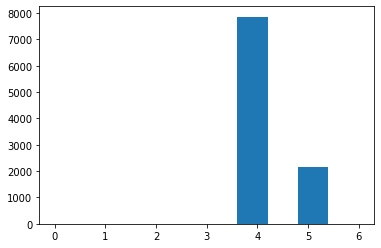

la probabilidad de sacar 21 con la baraja Española que es Cold Deck es de: 0.0
Distribución de las cartas: 


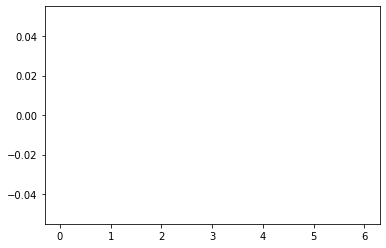

la probabilidad de sacar 21 con la baraja de Poker que es Hot Deck es de: 0.42387
Distribución de las cartas: 


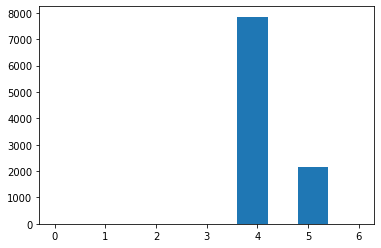

la probabilidad de sacar 21 con la baraja de Poker que es Cold Deck es de: 0.0
Distribución de las cartas: 


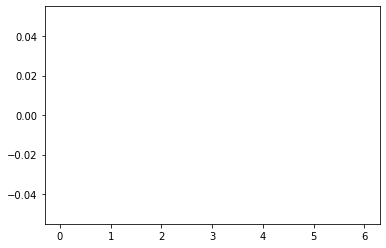

In [ ]:
import random
from numba import jit
import numpy as np
import matplotlib.pyplot 
import time     

#función para remover todos los 10: 

def diez_inador(cartas):
  for i in range(0,len(cartas)):
    if cartas[i] > 10:
      cartas[i] = 10 


#baraja española
cartas1 = [1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]

#baraja de poker 
cartas2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]

#se remueven cambian los numeros mayores a 10 por numeros "10", se ordena la lista y se vuelve un np.array
diez_inador(cartas1)
diez_inador(cartas2)
cartas1.sort()
cartas2.sort()
cartas1NumPy = np.array(cartas1)
cartas2NumPy = np.array(cartas2)

#creamos el hot deck
def hotDeck(cartas, rem):
  cont = 0
  hot = np.zeros(rem)
  for i in cartas:
    if i == 2 or i == 1:
      hot[cont] = i
      cont += 1
  temp = np.delete(cartas, np.where(cartas == 2.0))
  temp = np.delete(temp, np.where(temp == 1.0))
  for i in range(cont, rem):
    hot[i] = np.random.choice(temp)
  return hot
  
#creamos el cold deck
def coldDeck(cartas,rem):
  cold = np.zeros(rem)
  temp = np.delete(cartas, np.where(cartas == 2.0))
  temp = np.delete(temp, np.where(temp == 1.0))
  for i in range(0,rem):
    cold[i] = np.random.choice(temp)
  return cold 

#jugamos 21
def veintiuna_7_7_5(deck):
  cartas = 4
  deckT = deck
  total = 19 
  temp = np.random.choice(deckT)
  total = total + temp

  #eliminamos de la baraja la carta seleccioanda.
  for i in range(0, len(deckT) - 1): 
      if temp == deckT[i]:
        deckT = np.delete(deckT, i)
        break 

  # si la suma de las cartas es menor que 21, sacamos otra. 
  while total < 21: 
    temp = np.random.choice(deckT)
    total = total + temp
    cartas += 1 
  
  if total == 21:
    return np.array([1, cartas])
  
  if total > 21:
    return np.array([0, cartas])


def probabilidad_7_7_5(cartas, ciclos, baraja, temperatura):
  cont = 0 
  index = 0
  lista_res = np.zeros(10000)
  for i in range(0, ciclos):
    res = veintiuna_7_7_5(cartas)
    if (res[0] == 1):
      if (index < 9999): 
        lista_res[index] = res[1]
        index += 1
        cont += 1
      else: 
        cont += 1
      
  print("la probabilidad de sacar 21 con la baraja", baraja, "que es", temperatura, "es de:", (cont/ciclos))
  print("Distribución de las cartas: ")
  lista_res = lista_res[lista_res != 0]

  matplotlib.pyplot.hist(lista_res, range=[0, 6])
  matplotlib.pyplot.show()

    
hot_deck_spanish_12 = hotDeck(cartas1NumPy, 12)
cold_deck_spanish_12 = coldDeck(cartas1NumPy, 12)

hot_deck_poker_12 = hotDeck(cartas2NumPy, 12)
cold_deck_poker_12 = coldDeck(cartas2NumPy, 12)

print("Hot deck Spanish",hot_deck_spanish_12)
print("Cold deck Spanish",cold_deck_spanish_12)
print("Hot deck Poker",hot_deck_poker_12)
print("cold deck Spanish",cold_deck_poker_12)

lista_cartas_hot_deck_spanish_12 = probabilidad_7_7_5(hot_deck_spanish_12, 1000000, "Española", "Hot Deck")
lista_cartas_cold_deck_spanish_12 = probabilidad_7_7_5(cold_deck_spanish_12, 1000000, "Española", "Cold Deck")

lista_cartas_hot_deck_poker_12 = probabilidad_7_7_5(hot_deck_poker_12, 1000000, "de Poker", "Hot Deck")
lista_cartas_cold_deck_poker_12 = probabilidad_7_7_5(cold_deck_poker_12 , 1000000, "de Poker", "Cold Deck")





#Punto 5


In [ ]:
import random
import matplotlib.pyplot
deck_0 = [1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,11,12]
deck_1 = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]

def simWeekend(coldDeck):
  balance = 0
  for _ in range(600):
    d = random.randint(0, 9)
    deck = [] 
    sum = 0
    nCards = 3
    ap = 10

    if d == 0:
      deck = hotDeck(deck_0, 12).tolist()
      sum = 19
      ap = 1000
    else:
      deck = coldDeck.copy()
      nCards = 0

    while sum < 21:
      nCard = random.randint(0, len(deck)-1) ;
      sum +=  deck[nCard];
      del deck[nCard]
      nCards+=1;

    if sum == 21:
      #setN = np.append(setN,[nCards])
      balance += ap
    else:
      balance += -ap
  return balance

def simWeekendCards(coldDeck):
  setN = np.array([]);
  for _ in range(600):
    d = random.randint(0, 9)
    deck = [] 
    sum = 0
    nCards = 3

    if d == 0:
      deck = hotDeck(deck_0, 12).tolist()
      sum = 19
    else:
      deck = coldDeck.copy()
      nCards = 0

    while sum < 21:
      nCard = random.randint(0, len(deck)-1) ;
      sum +=  deck[nCard];
      del deck[nCard]
      nCards+=1;

    if sum == 21:
      setN = np.append(setN,[nCards])
  return setN

TBalance = 0
for _ in range(10000):
  TBalance += simWeekend(deck_0)
print("Balance espanol",TBalance/10000)

TBalance = 0
for _ in range(10000):
  TBalance += simWeekend(deck_1)
print("Balance poker",TBalance/10000)
totalCards =  np.array([])



Balance espanol -9043.395
Balance poker -9249.659


# Punto 6


In [ ]:
import random
from numba import jit
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import time     

#baraja española
cartas1 = [1,2,3,4,6,8,9,10,11,12,1,2,3,4,5,6,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]  

#baraja de poker 
cartas2 = [1,2,3,4,6,8,9,10,11,12,13,1,2,3,4,5,6,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]

#baraja española con 10's
cartas3 = [1,2,3,4,6,8,9,10,11,12,1,2,3,4,5,6,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]  

#baraja de poker con 10's
cartas4 = [1,2,3,4,6,8,9,10,11,12,13,1,2,3,4,5,6,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]

cartas1.sort()
cartas2.sort()
cartas3.sort()
cartas4.sort()
cartas1NumPy = np.array(cartas1)
cartas2NumPy = np.array(cartas2)
cartas3NumPy = np.array(cartas3)
cartas4NumPy = np.array(cartas4)


def hotDeck(cartas, rem):
  cont = 0
  hot = np.zeros(rem)
  for i in cartas:
    if i == 2 or i == 1:
      hot[cont] = i
      cont += 1
  temp = np.delete(cartas, np.where(cartas == 2.0))
  temp = np.delete(temp, np.where(temp == 1.0))
  for i in range(cont, rem): 
    hot[i] = np.random.choice(temp) 
  
    
  return hot
print(hotDeck(cartas2NumPy, 12), "<-   ejemplo hot deck con 12 cartas")

def veintiuna_7_7_5(deck):
  cartas = 3
  deckT = deck
  total = 19 
  temp = np.random.choice(deckT)
  total = total + temp

  #eliminamos de la baraja la carta seleccioanda.
  for i in range(0, len(deckT) - 1): 
      if temp == deckT[i]:
        deckT = np.delete(deckT, i)
        break 

  # si la suma de las cartas es menor que 21, sacamos otra. 
  while total < 21: 
    temp = np.random.choice(deckT)
    total = total + temp
    cartas += 1 
  
  if total == 21:
    return 1000
  
  if total > 21:
    return -1000

def veintiuna(deck):
  np.append(deck, [7, 7,5])#agregamos estos valores a la baraja porque como ven el inicio pusimos las barajas sin dos 7's y sin un 5 para el hot deck , pero esta 21 es con la braja completa , entonces necesita todos los valores 
  deck.sort()
  cartas = 0
  deckT = deck
  total = 0
  temp = np.random.choice(deckT)
  total = total + temp

  #eliminamos de la baraja la carta seleccioanda.
  for i in range(0, len(deckT) - 1): 
      if temp == deckT[i]:
        deckT = np.delete(deckT, i)
        break 

  # si la suma de las cartas es menor que 21, sacamos otra. 
  while total < 21: 
    temp = np.random.choice(deckT)
    total = total + temp
    cartas += 1 
  
  if total == 21:
    return 10
  
  if total > 21:
    return -10


      
  
n=int(input("cuantas pruebas quiere hacer: "))
AVGgananciaSpanish=0
AVGgananciaPoker=0
AVGgananciaSpanish10=0
AVGgananciaPoker10=0



gananciaSpanish=0
gananciaPoker=0
gananciaSpanish10=0
gananciaPoker10=0



for x in range (n):
  contPoker8_10_775=0
  contPoker8_775=0
  contSpanish8_10_775=0
  contSpanish8_775=0
  contPoker10=0
  contPoker=0
  contSpanish10=0
  contSpanish=0

  contSpanish8_775+=veintiuna_7_7_5(hotDeck(cartas1NumPy, 8))*0.1
  contPoker8_775+=veintiuna_7_7_5(hotDeck(cartas2NumPy, 8)) *0.1
  contSpanish8_10_775+=veintiuna_7_7_5(hotDeck(cartas3NumPy, 8))*0.1
  contPoker8_10_775+=veintiuna_7_7_5(hotDeck(cartas4NumPy, 8))*0.1  

  contSpanish+=veintiuna(cartas1NumPy)*0.9
  contPoker+=veintiuna(cartas2NumPy)*0.9
  contSpanish10+=veintiuna(cartas3NumPy)*0.9
  contPoker10+=veintiuna(cartas4NumPy)*0.9
  
  gananciaSpanish+=contSpanish8_775+contSpanish
  gananciaPoker+=contPoker8_775+contPoker
  gananciaSpanish10+=contSpanish8_10_775+contSpanish10
  gananciaPoker10+=contPoker8_10_775+contPoker10
  
AVGgananciaSpanish=gananciaSpanish/n*600
AVGgananciaPoker=gananciaPoker/n*600
AVGgananciaSpanish10=gananciaSpanish10/n*600
AVGgananciaPoker10=gananciaPoker10/n*600

print ("Dinero si ganara todas las partidas: ",1000*600)


print("si Ben juega con baraja española, ganara aprox ",AVGgananciaSpanish," dolares.")
print("si Ben juega con baraja española con 10's, ganara aprox ",AVGgananciaSpanish10," dolares.")
print("si Ben juega con baraja poker, ganara aprox ",AVGgananciaPoker," dolares.")
print("si Ben juega con baraja poker con 10's, ganara aprox ",AVGgananciaPoker10," dolares.")



[ 1.  1.  1.  1.  2.  2.  2.  2. 13. 13.  6.  6.] <-   ejemplo hot deck con 12 cartas
cuantas pruebas quiere hacer: 100
Dinero si ganara todas las partidas:  600000
si Ben juega con baraja española, ganara aprox  17160.0  dolares.
si Ben juega con baraja española con 10's, ganara aprox  26652.0  dolares.
si Ben juega con baraja poker, ganara aprox  30587.999999999996  dolares.
si Ben juega con baraja poker con 10's, ganara aprox  21636.0  dolares.
